v10
10


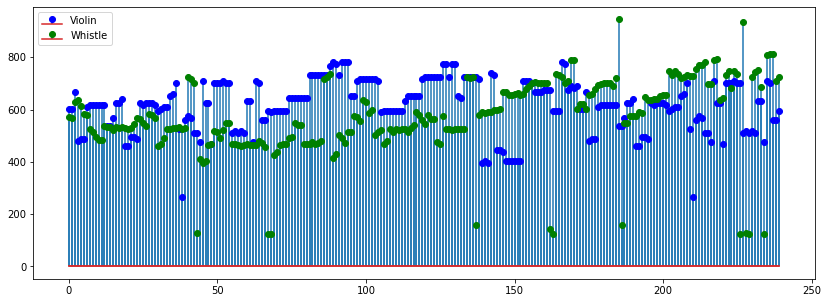

In [1]:
#process 

# 1 patak 
# 2 7th sym
# 3 bosno moja
# 4 uskudara
# 5 ode to joy
# 6 mad world
# 7 soto 
# 8 cvjetak 
# 9 lane moje
#10 rastanak

import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import os

curDoc = os.listdir()
wnames = [ele for ele in curDoc if ele.endswith(".npy")]

freqs = []
powers= []
times = []
names = []

for name in wnames:
    L = 305 - len(np.load(name)[1])
    a = np.concatenate((np.load(name)[1],np.load(name)[1],np.load(name)[1]))
    freqs.append(a[:240])
    
    b = np.concatenate((np.load(name)[2],np.array([0,]*L)))
    powers.append(b)
    
    c = np.concatenate((np.load(name)[0],np.array([0,]*L)))
    times.append(c)
    
    names.append(name[:-5])
    
freqs = np.array(freqs)
powers= np.array(powers)
times = np.array(times)
#%%
ratios = []
for vv in range(10):
    v11 = freqs[30+vv]
    #print(names[30+vv])
    
    kk=3*vv+1
    z11 = freqs[kk]
    #print(names[kk])
    rat = np.mean(z11/v11)
    ratios.append(rat)
    
#%%
vv = 0
v11 = freqs[30+vv]
print(names[30+vv])


kk=3*vv+2
z11 = freqs[kk]/ratios[vv]
print(names[kk])

plt.figure(figsize=(14,5))
plt.stem(v11, markerfmt='bo', label='Violin',use_line_collection=True)
plt.stem(z11, markerfmt='go', label='Whistle',use_line_collection=True)
plt.legend()


In [13]:
X = freqs[:30]
Y = []
for lab in names[:30]:
    s = [0,]*10
    inde = int(lab)
    if inde==10:
        s[0] = 1
    else:
        s[inde] = 1
    Y.append(s)

Xt = freqs[30:]
Yt = []
for lab in names[30:]:
    s = [0,]*10
    inde = int(lab[1:])
    if inde==10:
        s[0] = 1
    else:
        s[inde] = 1
    Yt.append(s)

X = np.array(X)
Y = np.array(Y)
Xt = np.array(Xt)
Yt = np.array(Yt)

len(X[0])

240

In [60]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(240, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

bilgi = model.fit(X, Y, epochs=40 ,validation_data=(Xt, Yt),verbose=0) # batch_size=16,

accuracy = model.evaluate(Xt, Yt)
print(accuracy)

10/10 [==============================] - 0s 100us/step
[38.05736541748047, 0.10000000149011612]


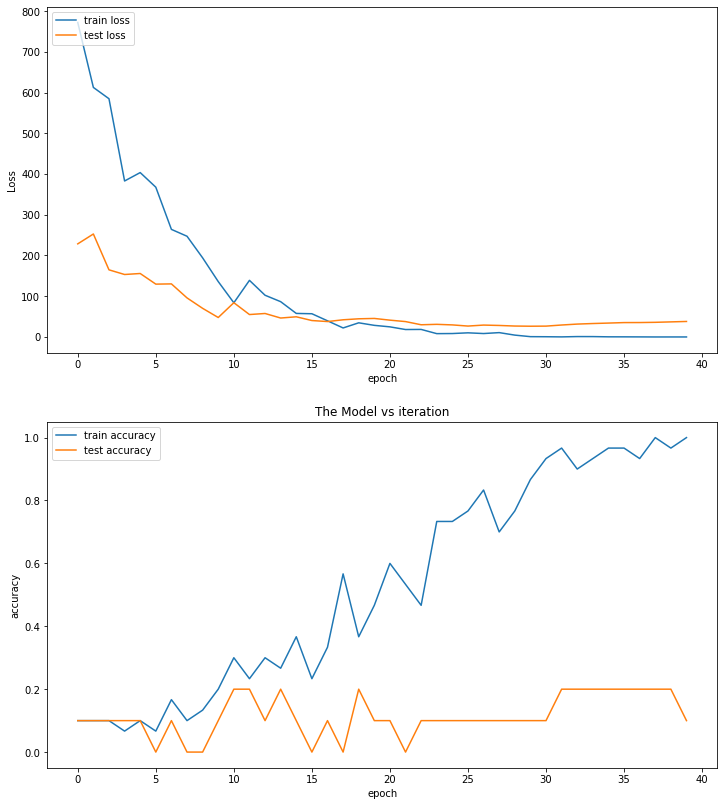

In [61]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,14))
plt.subplot("211")
plt.plot(bilgi.history['loss'])
plt.plot(bilgi.history['val_loss'])
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.subplot("212")
plt.plot(bilgi.history['accuracy'])
plt.plot(bilgi.history['val_accuracy'])
plt.title('The Model vs iteration')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

plt.show()

In [33]:
model.predict(Xt)

array([[0.11837077, 0.08776134, 0.1037597 , 0.06816192, 0.10979243,
        0.0990408 , 0.11177222, 0.11053131, 0.0846709 , 0.10613855],
       [0.11837077, 0.08776134, 0.1037597 , 0.06816192, 0.10979243,
        0.0990408 , 0.11177222, 0.11053131, 0.0846709 , 0.10613855],
       [0.11837077, 0.08776134, 0.1037597 , 0.06816192, 0.10979243,
        0.0990408 , 0.11177222, 0.11053131, 0.0846709 , 0.10613855],
       [0.11837077, 0.08776134, 0.1037597 , 0.06816192, 0.10979243,
        0.0990408 , 0.11177222, 0.11053131, 0.0846709 , 0.10613855],
       [0.11837077, 0.08776134, 0.1037597 , 0.06816192, 0.10979243,
        0.0990408 , 0.11177222, 0.11053131, 0.0846709 , 0.10613855],
       [0.11837077, 0.08776134, 0.1037597 , 0.06816192, 0.10979243,
        0.0990408 , 0.11177222, 0.11053131, 0.0846709 , 0.10613855],
       [0.11837077, 0.08776134, 0.1037597 , 0.06816192, 0.10979243,
        0.0990408 , 0.11177222, 0.11053131, 0.0846709 , 0.10613855],
       [0.11837077, 0.08776134, 0.1037597